In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

def generateRandomMat(dim, lower=-1, upper=1):
    # generates a random matrix with uniform distribution between lower and upper
    return (upper-lower)*np.random.rand(dim,dim)+lower;

def pivot(k, mat):
    #find which row will pivot (one with maximum absolute value at column k)
    indmax = k
    valmax = 0
    for i in range(k,len(mat)):
        #c = np.abs(mat[i,k])
        c= np.abs(mat[i,k])
        if valmax < c:
            valmax = c
            indmax = i
    #switch row k with row i
    mat[indmax], mat[k] = mat[k], mat[indmax].copy()
    return mat

def eliminate(k,mat):
    #eliminates the rows below k using only row k
    for i in range(k+1, len(mat)):
        mat[i] = mat[i] - mat[k]*(mat[i,k]/mat[k,k])
    return mat

def gepp(mat):
    #Gaussian elimination with partial pivoting
    for k in range(len(mat)-1):
        # for every row except the last, pivot and then eliminate
        pivot(k,mat)
        eliminate(k,mat)
    return mat

def maxUpp(mat):
    # find the maximum absolute value in upper triangular matrix
    mat = np.abs(mat)
    valmax = 0
    for i in range(len(mat)):
        for j in range(i,len(mat)):
            c = np.abs(mat[i,j])
            if valmax < c:
                valmax = c
    return valmax

def maxAll(mat):
    # find the max absolute value in the whole matrix
    matE = np.abs(mat)
    valmax = 0
    for i in range(len(matE)):
        for j in range(len(matE)):
            c = np.abs(matE[i,j])
            if valmax < c:
                valmax = c
    return valmax

def growthFactor(mat):
    # compute the growth factor of matrix
    maxa = maxAll(mat)
    maxu = maxUpp(gepp(mat))
    return maxu/maxa

All the above is code to compute growth factors of random matrices. At first, these matrices will have entries picked with a $U[-1,1]$ random variable. The next block computes the average growth factor for dimensions between 2 and 100, using a sample size of 40 matrices for each dimension. By plotting the data along with $g= \sqrt[3]{n^2}$, we see that it is really correlated so we conjecture that $\alpha =\frac{2}{3}$. We have also plotted $g = 2^n$ and we see that the average growth factor, although we know it could be close to $2^{n-1}$, is really lower that that. This justifies the fact that the GEPP method has been used for solving linear systems for a long time over the theoretically faster methods.

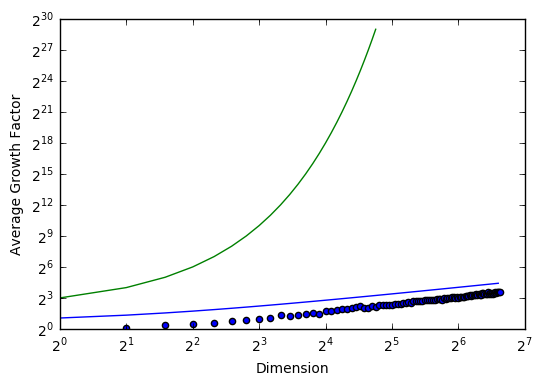

In [55]:
def avgGFactor(dim, sample=1000):
    # Computes the average growth Factor over 'sample' random matrices of size 'dim'
    sumFactors = 0
    for i in range(sample):
        sumFactors += growthFactor(generateRandomMat(dim))
    return sumFactors/sample

dims = range(2,100) # We look at dimensions from 2 to 100
avgs = [avgGFactor(dim,40) for dim in dims] # We compute the average factor for each dimension with 40 rand matrices
#plotting the growth factor against the dimension
plt.scatter(dims, avgs)
plt.plot(np.power(dims, 2/3))
plt.plot(np.power(2, range(2,30)))
plt.xlabel('Dimension')
plt.ylabel('Average Growth Factor')
plt.xscale('log', basex=2)
plt.yscale('log',basey=2)
plt.show()

We now plot the distributions of the growth factor for dimensions 10, 20, 40 and 80. We have observed that the distribution looked like a skewed normal distribution. Hence, we have decided to plot a best fitted pdf on top of the histograms and we arrive at great results. We can see from the graphs that the probability density seems to decay exponentially as the growth factor gets bigger.

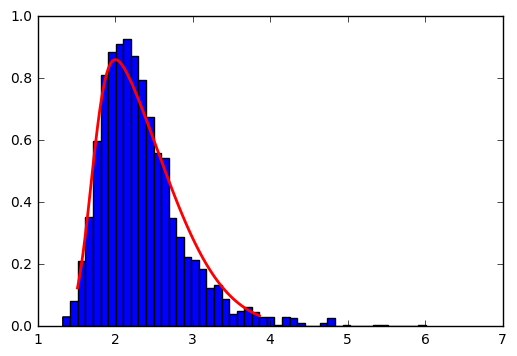

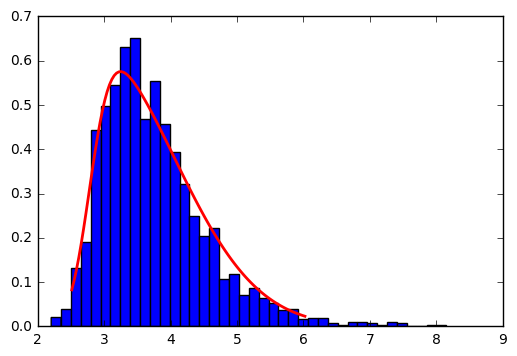

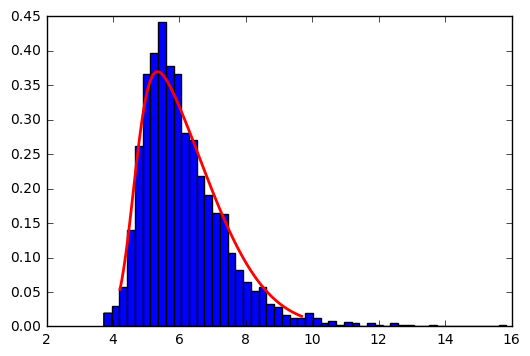

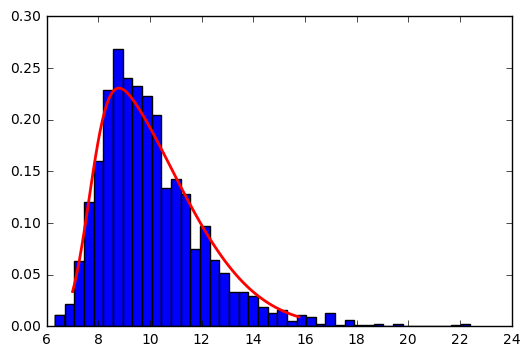

In [56]:
def graphDistWithFit(samples):
    # computes the best parameters for a skewnorm distribution and plots the histogram along wiht the pdf
    p1, p2, p3 = skewnorm.fit(samples)
    rv = skewnorm(p1, p2, p3)
    x = np.linspace(rv.ppf(0.01),rv.ppf(0.99), 100)
    plt.hist(samples, 'auto', normed=1)
    plt.plot(x,rv.pdf(x), 'r-', linewidth=2)
    plt.show()

# Look at distribution for n=10,20,40,80 with 2000 random matrices
samples = [growthFactor(generateRandomMat(10)) for i in range(2000)]
graphDistWithFit(samples)
samples = [growthFactor(generateRandomMat(20)) for i in range(2000)]
graphDistWithFit(samples)
samples = [growthFactor(generateRandomMat(40)) for i in range(2000)]
graphDistWithFit(samples)
samples = [growthFactor(generateRandomMat(80)) for i in range(2000)]
graphDistWithFit(samples)

We now change our function for generating random matrices to get entries with a $N(0,0.5)$ random variable. The results are very similar and no further discussion is needed. This does however agrees with the results from the paper that did not change drastically for different distributions.

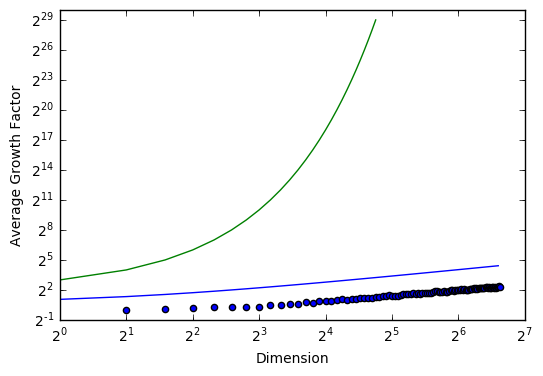

In [57]:
mu, sigma = 0, 0.5
def generateRandomMat(dim):
    # generates a random matrix with normal distribution mu = 0, sigma = 0.5
    return np.random.normal(mu, sigma, (dim,dim))

#As above, graphing the average growth factor against dimension
dims = range(2,100)
avgs = [avgGFactor(dim,40) for dim in dims]
plt.scatter(dims, avgs)
plt.plot(np.power(dims, 2/3))
plt.plot(np.power(2, range(2,30)))
plt.xlabel('Dimension')
plt.ylabel('Average Growth Factor')
plt.xscale('log', basex=2)
plt.yscale('log',basey=2)
plt.show()

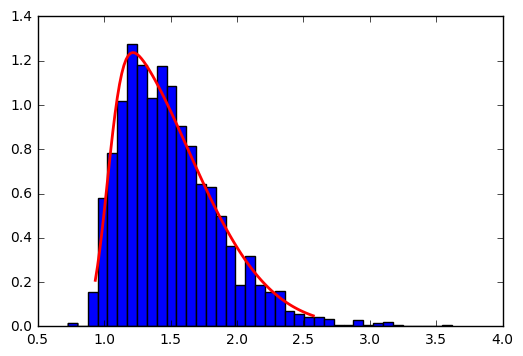

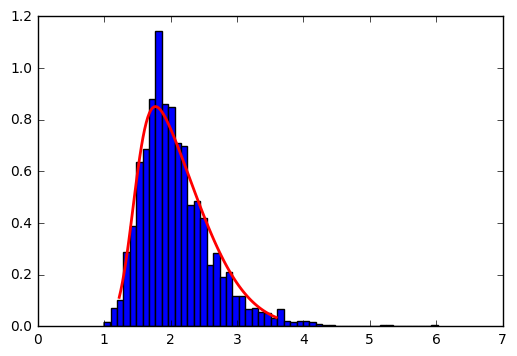

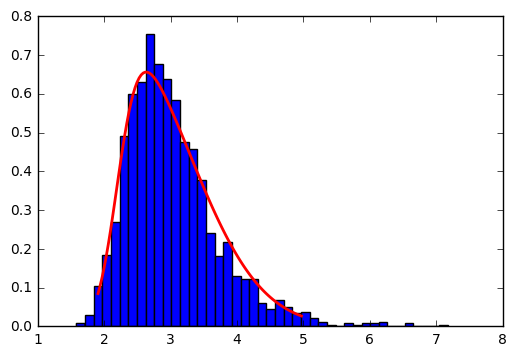

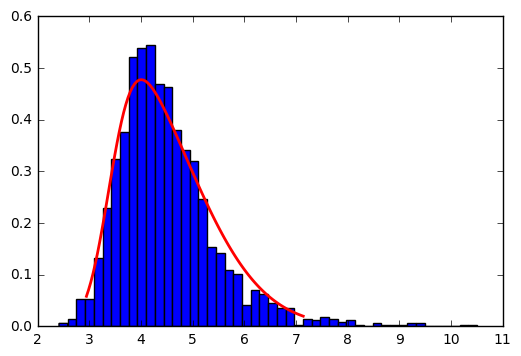

In [58]:
#As above, graphing the histogram for the growth factors and pdf with n=10,20,40,80
samples = [growthFactor(generateRandomMat(10)) for i in range(2000)]
graphDistWithFit(samples)
samples = [growthFactor(generateRandomMat(20)) for i in range(2000)]
graphDistWithFit(samples)
samples = [growthFactor(generateRandomMat(40)) for i in range(2000)]
graphDistWithFit(samples)
samples = [growthFactor(generateRandomMat(80)) for i in range(2000)]
graphDistWithFit(samples)